This markdown covers the:
* preprocessing of the data
* one-hot encoding of the data

Author: Mickael Bastard

In [1]:
import numpy as np
import pandas as pd
import random
import imp
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(1, './../utils/')
# importing the utils_main library as utm
import utils_main as utm

from lifetimes.utils import summary_data_from_transaction_data

# Loading in the data

In [2]:
portfolio, profile, transcript  = utm.readFiles(dropUnnecessaryCol = True)

In [3]:
profile.head()

,gender,age,id_membership,became_member_on,income
0,NA,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,NA,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,NA,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [4]:
print(profile.isnull().sum())

gender                 0
age                    0
id_membership          0
became_member_on       0
income              2175
dtype: int64


## plots

[Text(0.5, 1.0, 'AGE')]

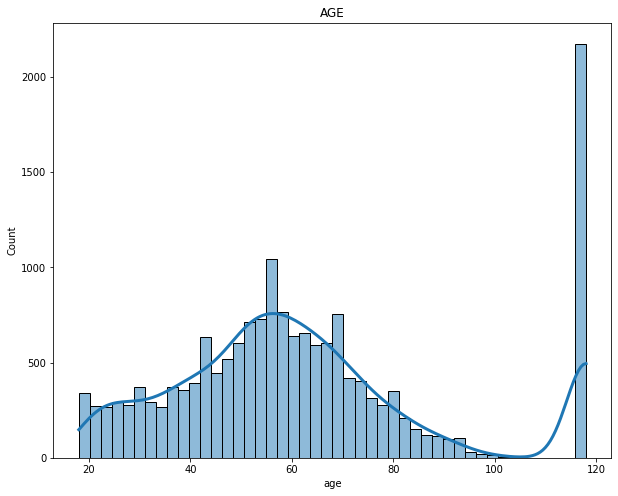

In [5]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "age",
             data=profile,
             #bins=25,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='AGE')

[Text(0.5, 1.0, 'INCOME')]

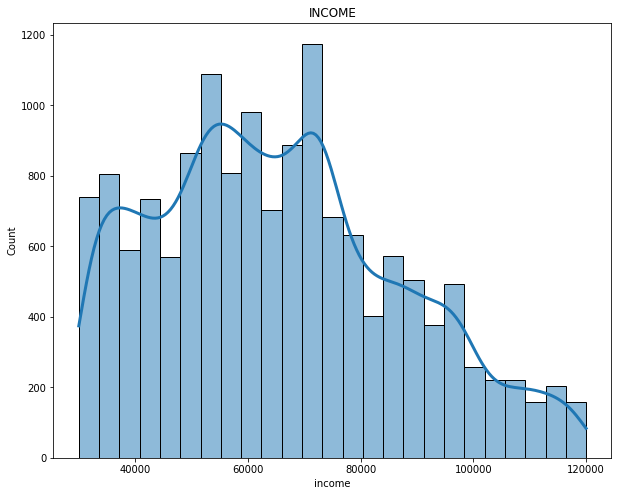

In [6]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "income",
             data=profile,
             bins=25,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='INCOME')

[Text(0.5, 1.0, 'BECAME MEMBER ON')]

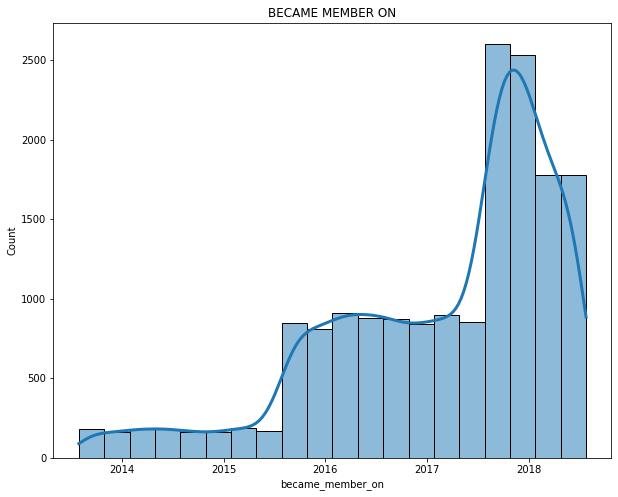

In [7]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "became_member_on",
             data=profile,
             bins=20,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='BECAME MEMBER ON')

* From 2013 to mid-2015, the subscription rate is about 166 people per quarter. The sbscription rate is constant.
* From mid-2015 to mid-2017, the subscription rate is slightly less than 1000 people per quarter. The sbscription rate is constant.
* From mid-2017 to mid-2018, the subscription rate increases to reach more than 1750 people per quarter

# Dealing with missing values in the `profile` dataset (optionnal)

In [8]:
imp.reload(utm)

<module 'utils_main' from 'C:\\Users\\micka\\01_GitHub_mbastard\\TargetingCustomers_DAIB\\prep\\./../utils\\utils_main.py'>

In [9]:
profile = utm.missingValuesProfileIncome(profile, how = 'impute')

In [10]:
profile = utm.missingValuesProfileGender(profile, how = 'impute')

In [11]:
profile = utm.missingValuesProfileAge(profile, how = 'impute')

In [12]:
print(profile.isnull().sum())

gender              0
age                 0
id_membership       0
became_member_on    0
income              0
dtype: int64


# Pre-processing

In [13]:
imp.reload(utm)

<module 'utils_main' from 'C:\\Users\\micka\\01_GitHub_mbastard\\TargetingCustomers_DAIB\\prep\\./../utils\\utils_main.py'>

In [14]:
profile_prep = utm.preprocessing(portfolio, profile, transcript)
profile = profile_prep

In [15]:
profile.shape

(17000, 15)

In [16]:
print(profile_prep.isnull().sum())

id_membership                   0
prep_tot_aver_spend_bogo        0
prep_tot_aver_spend_discount    0
prep_recency                    0
prep_T                          0
prep_nb_of_offer_view           0
prep_nb_of_offer_rec            0
prep_nb_of_transactions         0
prep_nb_of_offer_comp           0
prep_tot_spend                  0
prep_tot_aver_spend             0
gender                          0
age                             0
became_member_on                0
income                          0
dtype: int64


## Plots

[Text(0.5, 1.0, 'TOTAL AVERAGE SPEND ON BOGO OFFERS PER CUSTOMER')]

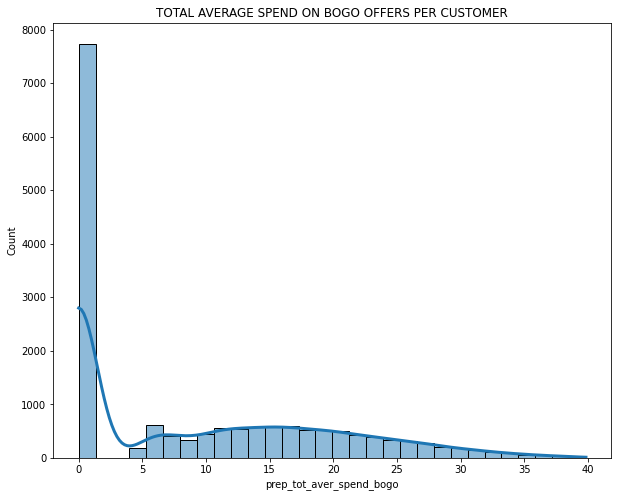

In [17]:
profile_prep_filt = profile_prep.query("prep_tot_aver_spend_bogo<40")

fig, ax = plt.subplots(figsize=(10,8))
f = sns.histplot(x= "prep_tot_aver_spend_bogo",
             data=profile_prep_filt,
             #bins=20,
             kde=True,
             line_kws={"linewidth":3},
             ax=ax)
f.set(title='TOTAL AVERAGE SPEND ON BOGO OFFERS PER CUSTOMER')
#ax.set_xlim(0,100)

[Text(0.5, 1.0, 'TOTAL AVERAGE SPEND ON DISCOUNT OFFERS PER CUSTOMER')]

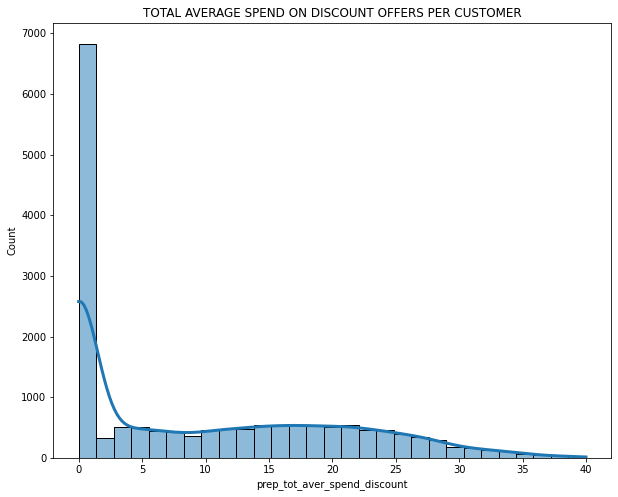

In [18]:
profile_prep_filt = profile_prep.query("prep_tot_aver_spend_discount<40")

fig, ax = plt.subplots(figsize=(10,8))
f = sns.histplot(x= "prep_tot_aver_spend_discount",
             data=profile_prep_filt,
             #bins=20,
             kde=True,
             line_kws={"linewidth":3},
             ax=ax)
f.set(title='TOTAL AVERAGE SPEND ON DISCOUNT OFFERS PER CUSTOMER')
#ax.set_xlim(0,100)

[Text(0.5, 1.0, 'TOTAL SPEND PER CUSTOMER')]

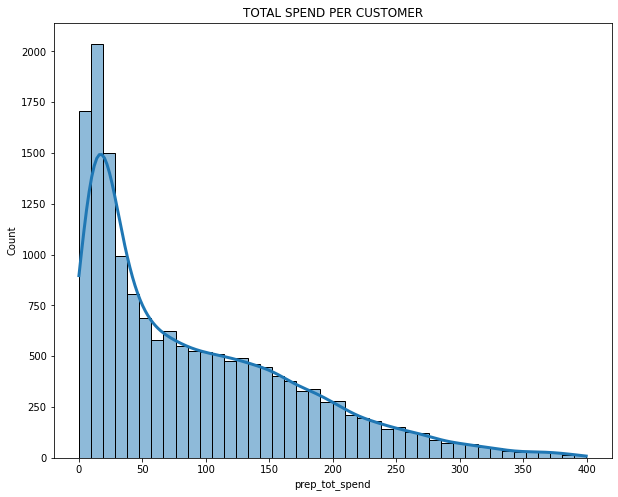

In [19]:
profile_prep_filt = profile_prep.query("prep_tot_spend<400")

fig, ax = plt.subplots(figsize=(10,8))
f = sns.histplot(x= "prep_tot_spend",
             data=profile_prep_filt,
             #bins=20,
             kde=True,
             line_kws={"linewidth":3},
             ax=ax)
f.set(title='TOTAL SPEND PER CUSTOMER')
#ax.set_xlim(0,100)

[Text(0.5, 1.0, 'TOTAL AVERAGE SPEND PER CUSTOMER')]

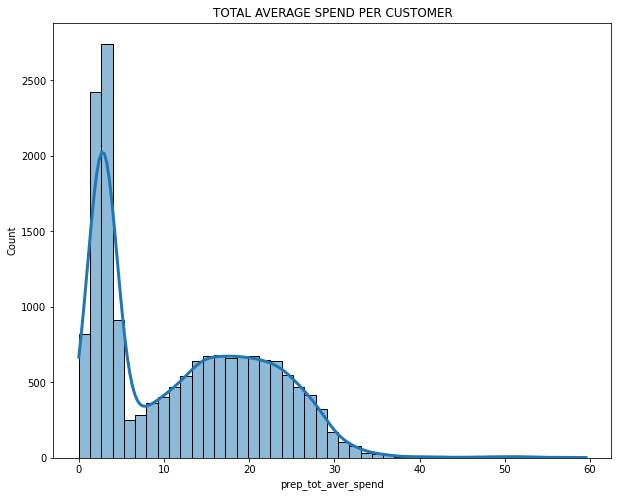

In [20]:
profile_prep_filt = profile_prep.query("prep_tot_aver_spend<60")

fig, ax = plt.subplots(figsize=(10,8))
f = sns.histplot(x= "prep_tot_aver_spend",
             data=profile_prep_filt,
             #bins=20,
             kde=True,
             line_kws={"linewidth":3},
             ax=ax)
f.set(title='TOTAL AVERAGE SPEND PER CUSTOMER')
#ax.set_xlim(0,100)

[Text(0.5, 1.0, 'RECENCY')]

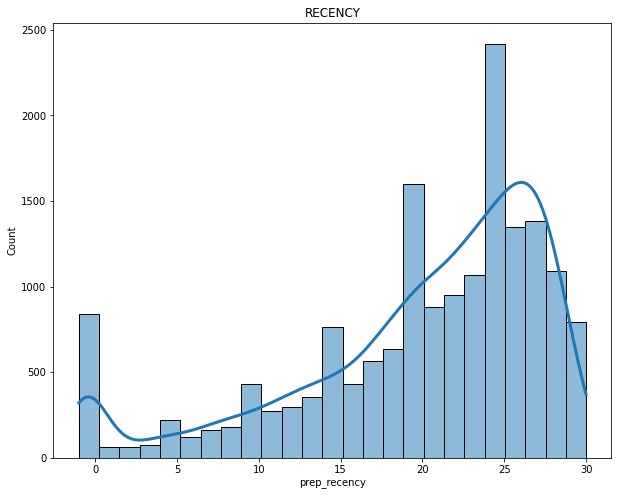

In [21]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_recency",
             data=profile_prep,
             bins=25,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='RECENCY')

Recency : age of the customer when they made their most recent purchases in number of days. This is equal to the duration between a customer’s first purchase and their latest purchase.

[Text(0.5, 1.0, 'T')]

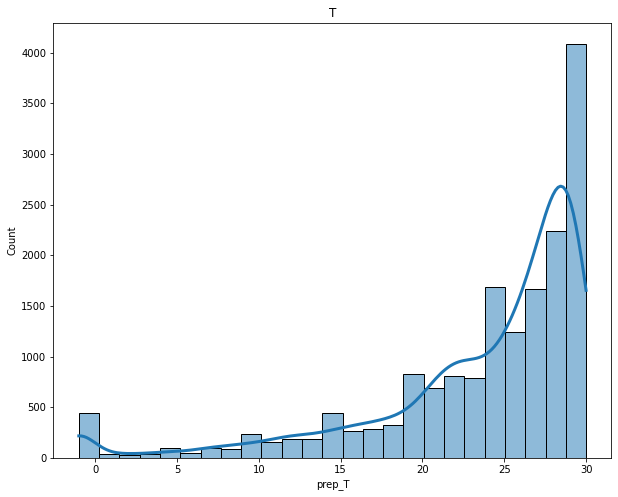

In [22]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_T",
             data=profile_prep,
             bins=25,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='T')

T : age of the customer in days. This is equal to the duration between a customer’s first purchase and the end of the period under study.

[Text(0.5, 1.0, 'NUMBER OF TRANSACTIONS OVER THE SET PROMOTION PERIOD')]

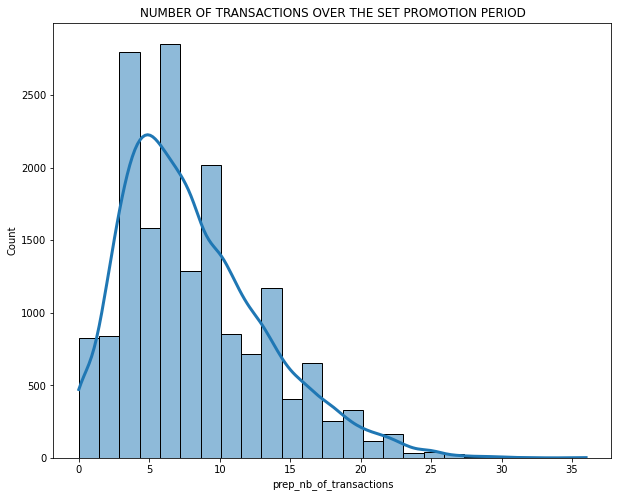

In [23]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_nb_of_transactions",
             data=profile_prep,
             bins=25,
             kde=True,
             line_kws={"linewidth":3})
f.set(title='NUMBER OF TRANSACTIONS OVER THE SET PROMOTION PERIOD')

[Text(0.5, 1.0, 'NUMBER OF OFFER RECEIVED OVER THE SET PROMOTION PERIOD')]

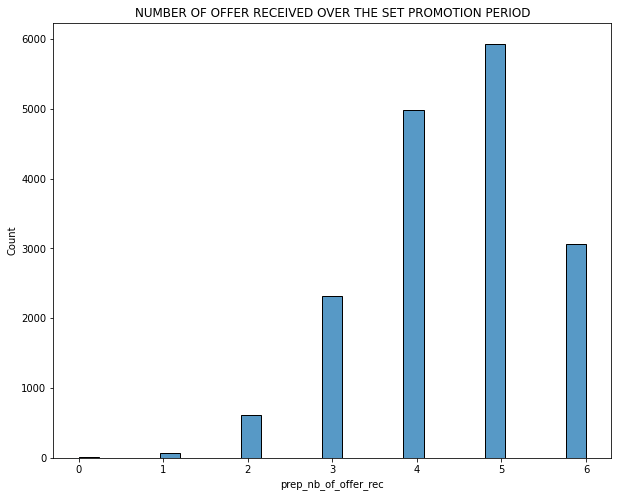

In [24]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_nb_of_offer_rec",
             data=profile_prep,
             bins=25,
             kde=False,
             line_kws={"linewidth":3})
f.set(title='NUMBER OF OFFER RECEIVED OVER THE SET PROMOTION PERIOD')

[Text(0.5, 1.0, 'NUMBER OF OFFER VIEWED OVER THE SET PROMOTION PERIOD')]

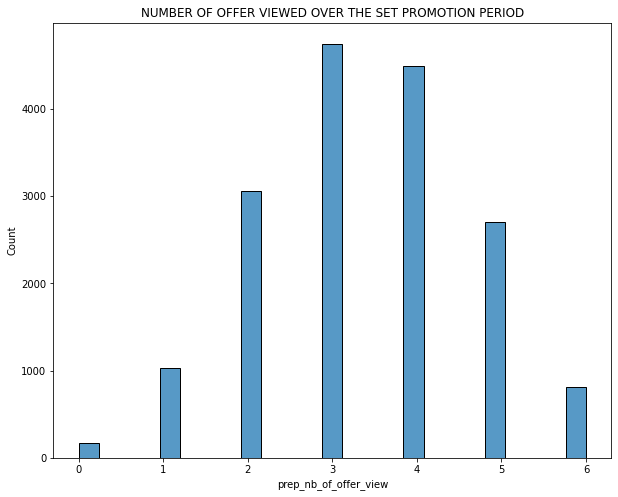

In [25]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_nb_of_offer_view",
             data=profile_prep,
             bins=25,
             kde=False,
             line_kws={"linewidth":3})
f.set(title='NUMBER OF OFFER VIEWED OVER THE SET PROMOTION PERIOD')

[Text(0.5, 1.0, 'NUMBER OF OFFER COMPLETED OVER THE SET PROMOTION PERIOD')]

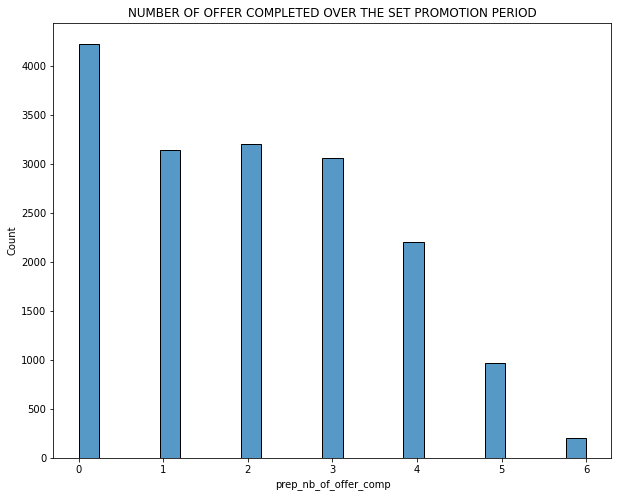

In [26]:
plt.figure(figsize=(10,8))
f = sns.histplot(x= "prep_nb_of_offer_comp",
             data=profile_prep,
             bins=25,
             kde=False,
             line_kws={"linewidth":3})
f.set(title='NUMBER OF OFFER COMPLETED OVER THE SET PROMOTION PERIOD')

# One-hot encoding

In [27]:
portfolio, profile, transcript = utm.oneHotEncoder(portfolio, profile, transcript, dropUnnecessaryCol = False)

In [28]:
profile.columns

Index(['id_membership', 'prep_tot_aver_spend_bogo',
       'prep_tot_aver_spend_discount', 'prep_recency', 'prep_T',
       'prep_nb_of_offer_view', 'prep_nb_of_offer_rec',
       'prep_nb_of_transactions', 'prep_nb_of_offer_comp', 'prep_tot_spend',
       'prep_tot_aver_spend', 'gender', 'age', 'became_member_on', 'income',
       'year_joined', 'gender_F', 'gender_M', 'gender_O', 'year_joined_2013',
       'year_joined_2014', 'year_joined_2015', 'year_joined_2016',
       'year_joined_2017', 'year_joined_2018'],
      dtype='object')

In [29]:
profile.shape

(17000, 25)

In [30]:
print(profile.isnull().sum())

id_membership                   0
prep_tot_aver_spend_bogo        0
prep_tot_aver_spend_discount    0
prep_recency                    0
prep_T                          0
prep_nb_of_offer_view           0
prep_nb_of_offer_rec            0
prep_nb_of_transactions         0
prep_nb_of_offer_comp           0
prep_tot_spend                  0
prep_tot_aver_spend             0
gender                          0
age                             0
became_member_on                0
income                          0
year_joined                     0
gender_F                        0
gender_M                        0
gender_O                        0
year_joined_2013                0
year_joined_2014                0
year_joined_2015                0
year_joined_2016                0
year_joined_2017                0
year_joined_2018                0
dtype: int64
